# AICadium ML Project
### Build a machine learning model to predict whether a customer will buy a product or not.

The focus is not on optimizing the model evaluation metrics, but in demonstrating familiarity in multiple aspects of creating a solution, including data exploration, feature engineering, model selection, etc.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
import datetime
from statsmodels.graphics.mosaicplot import mosaic
sns.set_style("darkgrid")

## Get Acquainted with the Dataset

In [2]:
customer_data = pd.read_csv('coding_round_data.csv')

In [3]:
print(f'Number of Records: {len(customer_data)}')
print(f'Number of Variables: {len(customer_data.keys())}')
print(f'Any NaN values? {customer_data.isnull().values.any()}')

# Explicitly define these variables to make sure functions below are taking in the right variables
# (as opposed to doing position-based indexing, e.g. customer_data.iloc[:, 0:10])
num_vars = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', \
            'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
cat_vars = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']

# The first 10 variables are numerical, while the last 8 are categorical: {'Month', ..., 'Revenue'}.
# The column 'Revenue' contains our data labels.
customer_data.head()

Number of Records: 12330
Number of Variables: 18
Any NaN values? False


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
customer_data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [5]:
# We see outliers for quite a few of these variables, e.g. coming from customers who
# left their computers open on webpages, leading to extremely long duration times.
# Let us remove these outliers for better data exploration/visualization (e.g. with histograms).

# Booleans determining whether the row should be filtered if any of the columns are `z_thresh`
# standard deviations outside the mean for that variable.
z_thresh = 6
is_filtered_row = (np.abs(stats.zscore(customer_data.loc[:, num_vars])) < z_thresh).all(axis=1)

print(f'Num outliers removed: {len(is_filtered_row[~is_filtered_row])}')

customer_data = customer_data.loc[is_filtered_row, :]

Num outliers removed: 268


In [6]:
customer_data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000
mean,2.216465,70.801538,0.443293,24.395503,29.443459,1092.115989,0.022552,0.043580,5.179160,0.062228,2.122699,2.353092,3.149809,4.067402
std,3.173111,132.224813,1.088746,87.129080,36.014563,1458.609911,0.048948,0.048957,14.528809,0.200085,0.909849,1.710378,2.401881,4.014093
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,180.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,5.500000,0.000000,0.000000,17.000000,583.076389,0.003110,0.025606,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,3.000000,89.000000,0.000000,0.000000,37.000000,1407.468750,0.017391,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,22.000000,1130.502941,8.000000,872.000000,293.000000,12634.620890,0.200000,0.200000,116.337865,1.000000,8.000000,13.000000,9.000000,20.000000


### Correlation Matrix

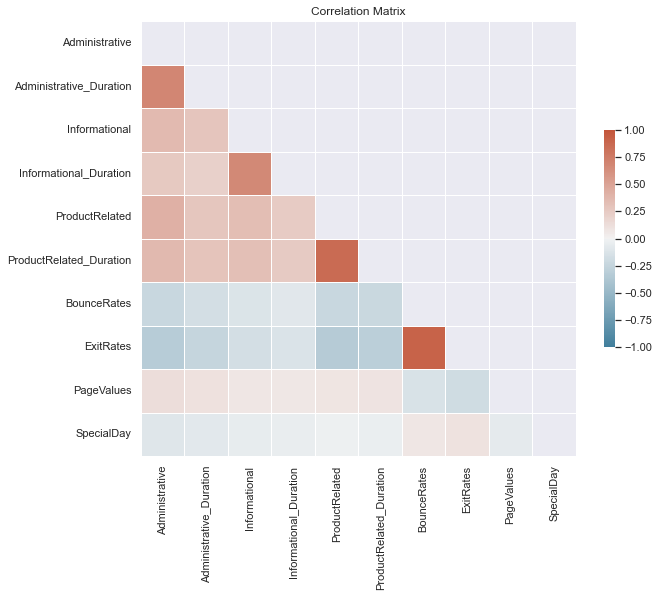

In [7]:
sns.set(rc = {'figure.figsize':(10,8)})

# Visualize a correlation matrix for the numerical variables
corr_mat = customer_data.loc[:, num_vars].corr()

# mask out the upper triangle for better viewing
mask = np.triu(np.ones_like(corr_mat, dtype=bool))

cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_mat, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0.0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});
plt.title('Correlation Matrix');

# We see high correlations between:
# - ProductRelated_Duration and ProductRelated
# - ExitRates and BounceRates

# To avoid collinearities, for each of these pairs, we should potentially pick the variable that has the higher predictive
# power w.r.t Revenue

### Histograms

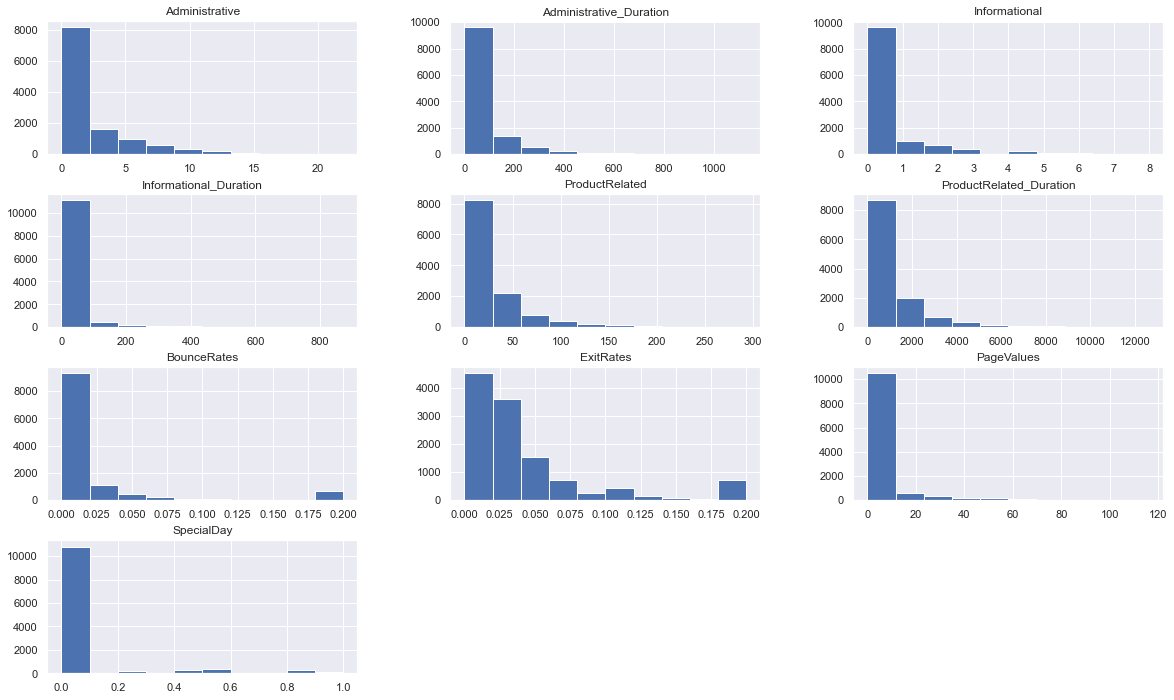

In [8]:
# Plot histograms of the numerical variables
sns.set(rc = {'figure.figsize':(20,12)})

customer_data.loc[:, num_vars].hist();

# We see heavily right-skewed histograms. However, we will not need to apply any log or box-cox given the
# types of models we use later on.

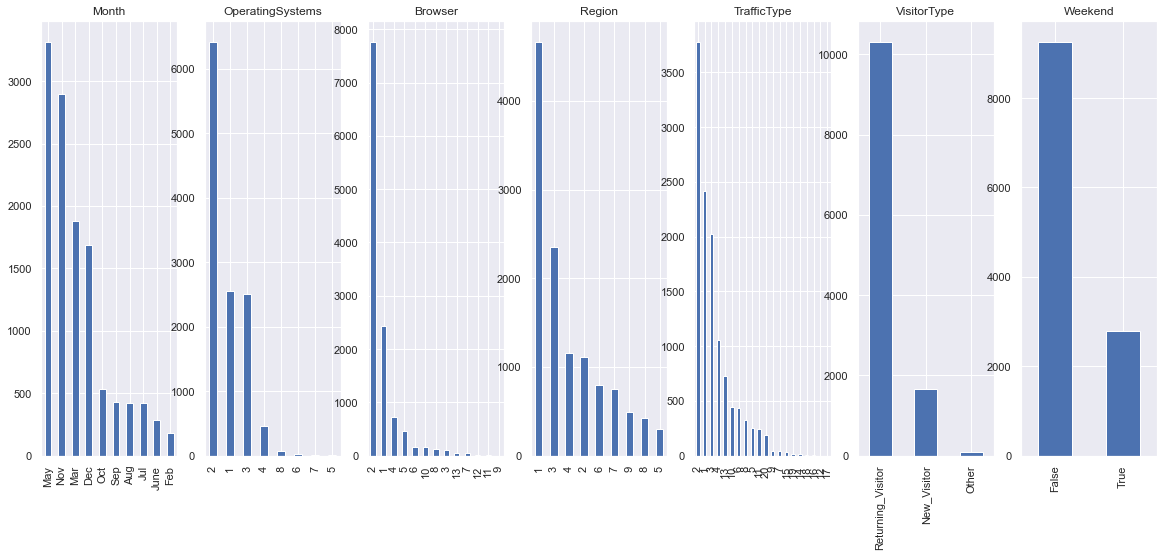

In [9]:
sns.set(rc = {'figure.figsize':(20,8)})
# Plot histograms of the categorical variables

fig, ax = plt.subplots(1, len(cat_vars))
for (i, var) in enumerate(customer_data[cat_vars]):
    customer_data[var].value_counts().plot(kind='bar', ax=ax[i]).set_title(var);
    
# We see categorical variables here that: (1) have many values for each variable, and (2) are heavily imbalanced.

## Feature Selection

In an attempt to use the categorical variables in our model, one-hot encodings were added for `VisitorType`. However, later evaluation showed this led to poorer performance. Due to the curse of dimensionality, I decided to not to try other categorical variables as other categorical variables have even more possible values than `VisitorType`. More work can be done here in the future.

As to the numerical variables, I took a look at how much information gain each variable provides, as described by a random forest classifier. Choosing just `k` number of those variables ended up leading to no difference in model performance - ultimately all numerical variables were used as features in the final model.

### Mosaic Plots to Assess Predictive Power of Categorical Variables

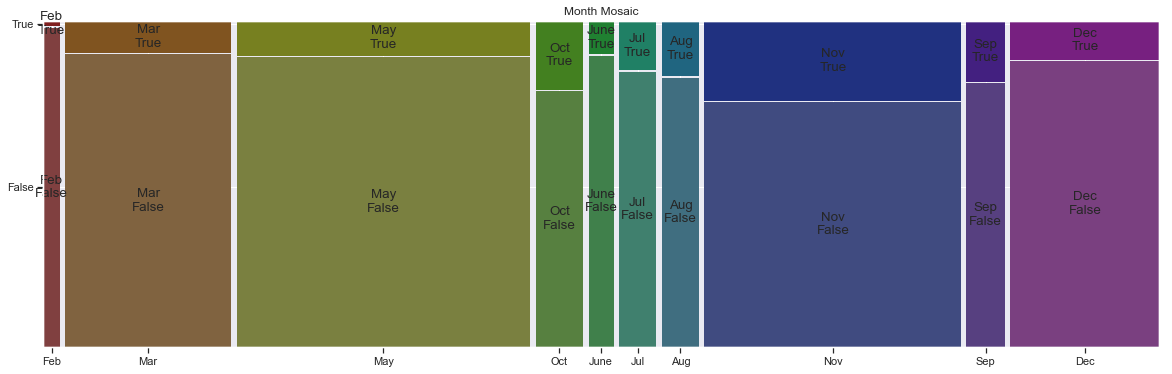

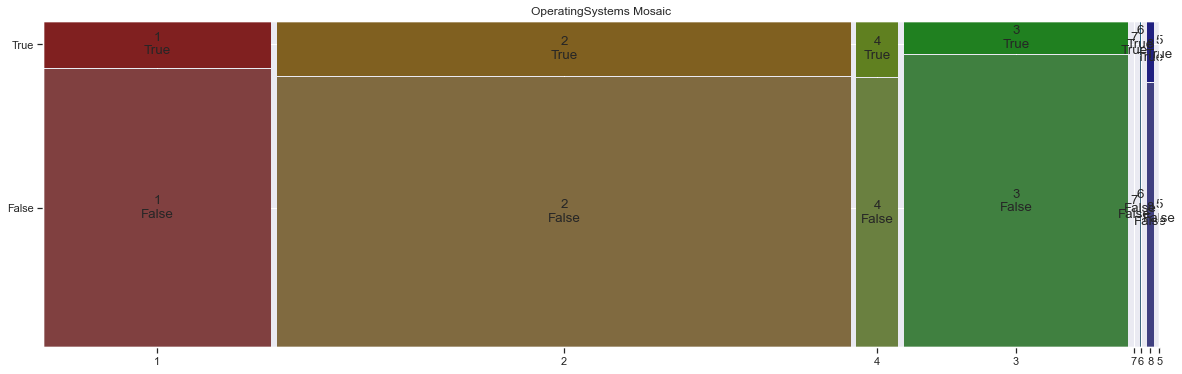

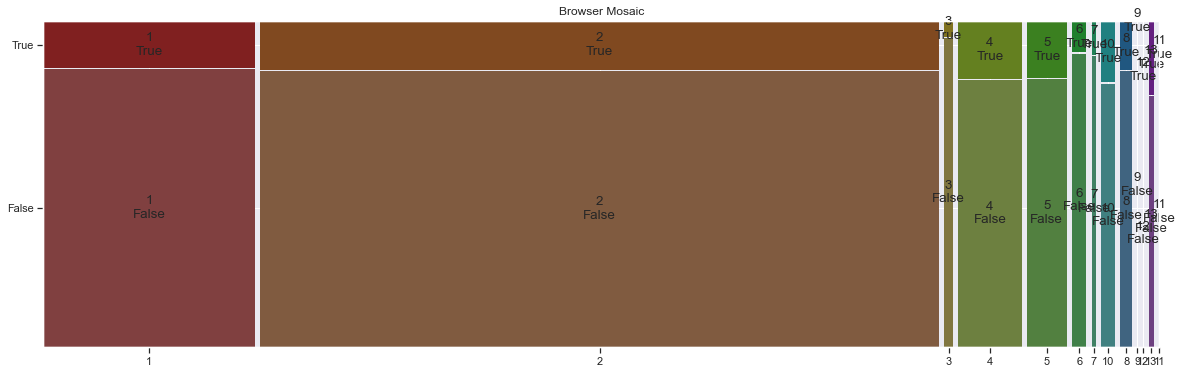

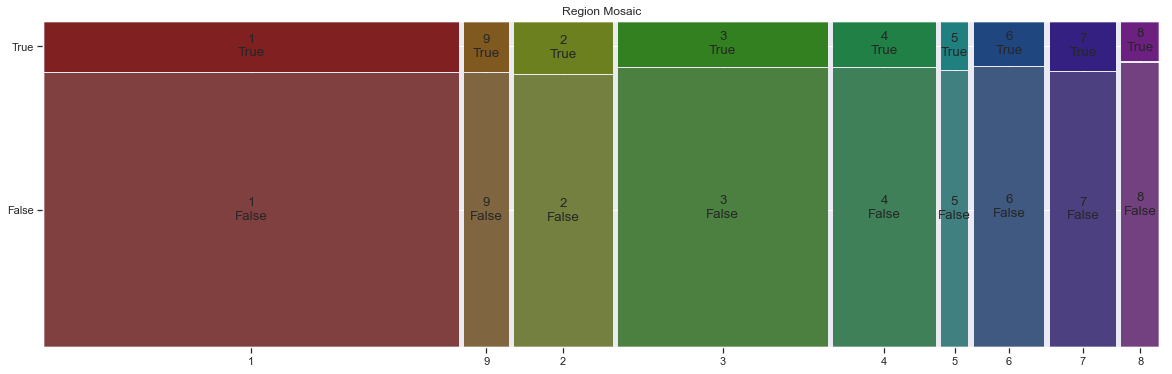

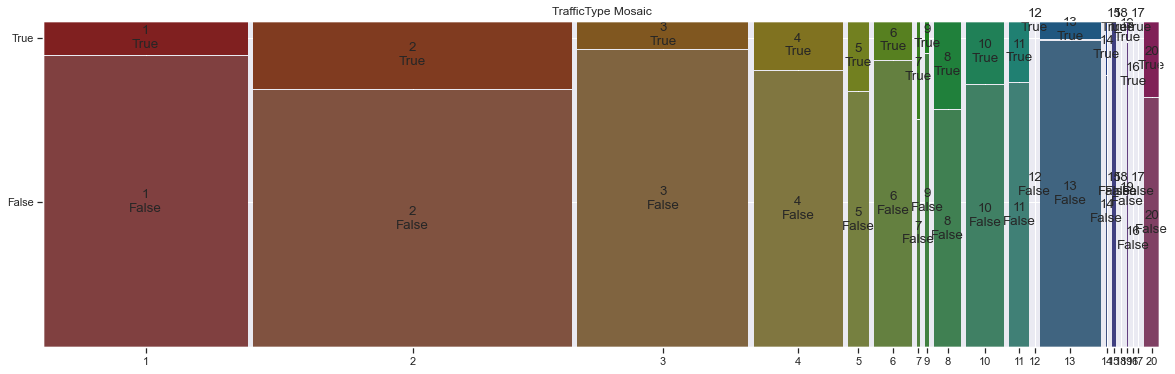

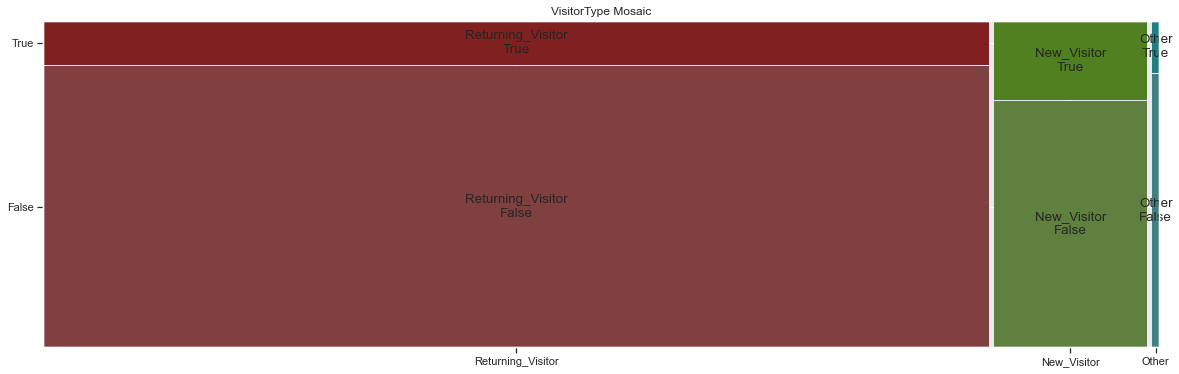

In [10]:
sns.set(rc = {'figure.figsize':(20,6)}) # 20, 20 for better viewing
matplotlib.rcParams.update({'font.size': 16})

mosaic(customer_data, ['Month', 'Revenue'], title='Month Mosaic');

mosaic(customer_data, ['OperatingSystems', 'Revenue'], title='OperatingSystems Mosaic');

mosaic(customer_data, ['Browser', 'Revenue'], title='Browser Mosaic');

# Whether a customer bought or not does not seem to vary much by region.
mosaic(customer_data, ['Region', 'Revenue'], title='Region Mosaic');

mosaic(customer_data, ['TrafficType', 'Revenue'], title='TrafficType Mosaic');

# A new visitor is twice as likely as a returning visitor to purchase a product. A good candidate for 
# one hot encoding given the signal + the limited number of values (to avoid adding too many dimensions).
mosaic(customer_data, ['VisitorType', 'Revenue'], title='VisitorType Mosaic');

# For a given categorical variable, we have to be careful of reading too much into a particular value
# having a high signal of a customer purchasing when there are few samples of that value.

In [11]:
# Use one-hot encoding on VisitorType so we can try using this variable in our model. Adding VisitorType as a feature did not 
# significantly increase performance however, so no additional one-hot encodings were added to the dataframe.
customer_data = pd.get_dummies(customer_data, columns=['VisitorType'])

In [12]:
# Specifying the final features to be used

# Using all the features
features = num_vars

# Using the top 6 features based on mean decrease in purity by the RF classifier
# - did not see a significant improvement by selecting only these features
# features = ['PageValues', 'ExitRates', 'ProductRelated_Duration', 'ProductRelated', 'Administrative_Duration', 'BounceRates']

# Adding one-hot encoded promising categorical variables
# - did not see any improvement by adding these one-hot encodings, if anything led to a decrease in performance
# features = num_vars + ['VisitorType_New_Visitor', 'VisitorType_Other', 'VisitorType_Returning_Visitor']

# Removing features to avoid collinearities
# - doing this ended up leading to a decrease in performance
# features.remove('BounceRates')
# features.remove('ProductRelated')
features

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay']

In [13]:
from sklearn.model_selection import train_test_split, cross_validate

# Split data into training and test sets
X_train, X_test, y_train, y_test = \
    train_test_split(customer_data.loc[:, features], customer_data.loc[:, 'Revenue'], \
                     test_size=0.2, random_state=42)

### Random Forest Classifier

In [14]:
# Defining this model now for use in feature selection

from sklearn.ensemble import RandomForestClassifier
class RFThreshClassifier(RandomForestClassifier):
    """ Random forest classifier with predictions modified by a probability threshold. """
    def predict(self, X, threshold = 0.3):
        """Usage: clf.predict(X, threshold = 0.8)
           Default threshold chosen based on cross-validation performance on training data."""
        pred_probs = super(RFThreshClassifier, self).predict_proba(X)
        return pred_probs[:, 1] > threshold

In [15]:
# Use balanced class weighting due to the imbalance of 'True' and 'False' samples in 'Revenue'.
clf = RFThreshClassifier(class_weight='balanced', random_state=0)

In [16]:
clf.fit(X_train, y_train);

### Mean Decrease in Impurity Plot to Assess Predictive Power of Numerical Variables

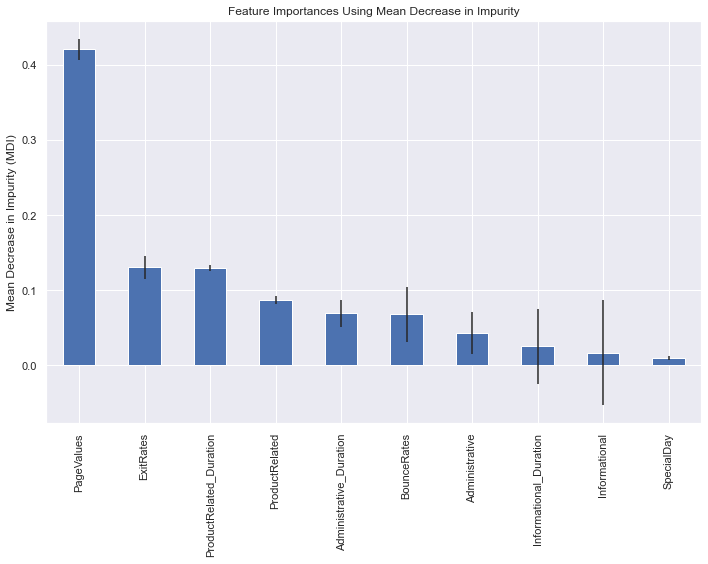

In [17]:
# Plot showing how much each feature leads to a decrease impurity (or equivalently, how much information gain).
sns.set(rc = {'figure.figsize':(10,8)})

std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
feature_importances = pd.Series(clf.feature_importances_, index=features).sort_values(ascending=False)

fig, ax = plt.subplots()
feature_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature Importances Using Mean Decrease in Impurity")
ax.set_ylabel("Mean Decrease in Impurity (MDI)")
fig.tight_layout()

## Model Selection, Training, and Evaluation

Several different models were tried, including logistic regression, and `random forests` led to the best performance on the training set as evaluated with cross validation. More work could be done in the future here.

What's worse, not identifying a customer that actually ends up buying a product, or incorrectly believing a customer is going to buy when they're not? Depends on the business use case for this ML model, but let us assume the former is worse, i.e. false negatives are worse than false positives, because we otherwise are missing out on targeting customers that can generate revenue for the business. As such, we should optimize for recall over precision when evaluating our models.

Precision = TP / (TP + FP)

Recall  = TP / (TP + FN)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_fscore_support
from sklearn.model_selection import train_test_split, cross_validate

In [19]:
# Redefining this model here for easier viewing
class RFThreshClassifier(RandomForestClassifier):
    """ Random forest classifier with predictions modified by a probability threshold. """
    def predict(self, X, threshold = 0.3):
        """Usage: clf.predict(X, threshold = 0.8)
           Default threshold chosen based on cross-validation performance on training data."""
        pred_probs = super(RFThreshClassifier, self).predict_proba(X)
        return pred_probs[:, 1] > threshold

In [20]:
# Use balanced class weighting due to the imbalance of 'True' and 'False' samples in 'Revenue'.
clf = RFThreshClassifier(class_weight='balanced', random_state=0)

In [21]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = \
    train_test_split(customer_data.loc[:, features], customer_data.loc[:, 'Revenue'], \
                     test_size=0.2, random_state=42)

In [22]:
scores = cross_validate(clf, X_train, y_train, cv=10, scoring={'recall', 'precision', 'f1'})
print(f'Recall:    Mean={scores["test_recall"].mean():.2f}, Std={scores["test_recall"].std():.2f}')
print(f'Precision: Mean={scores["test_precision"].mean():.2f}, Std={scores["test_precision"].std():.2f}')
print(f'F1 Score:  Mean={scores["test_f1"].mean():.2f}, Std={scores["test_f1"].std():.2f}')

# In the future, more work can be done tuning other hyperparameters of the random forest model,
# e.g. max_depth, max_leaf_nodes, bootstrap, etc.

Recall:    Mean=0.73, Std=0.03
Precision: Mean=0.59, Std=0.03
F1 Score:  Mean=0.65, Std=0.02


In [23]:
# Before performing any further steps, make sure we fit on all the training data.
clf.fit(X_train, y_train);

### Model Evaluation

Test the model's performance on unseen data (the 20% of data not used for training/cross-validation). We demonstrate an ROC curve with an AUC of approx. 0.89, which shows reasonable classifier performance.

In [24]:
y_pred = clf.predict(X_test)
y_test_probs = clf.predict_proba(X_test)[:, 1] # probability of the positive class (should match clf.classes_)
confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)

precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred)
print(f'Recall   : {recall[1]}')
print(f'Precision: {precision[1]}')
print(f'F1 Score : {fscore[1]}')

[[1872  179]
 [ 104  258]]
Recall   : 0.712707182320442
Precision: 0.5903890160183066
F1 Score : 0.6458072590738423


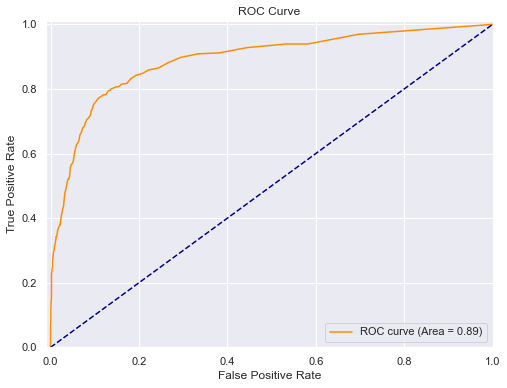

In [25]:
sns.set(rc = {'figure.figsize':(8,6)})

fpr, tpr, thresh = roc_curve(y_test, y_test_probs)

plt.figure()
plt.plot(fpr, tpr, color="darkorange", label="ROC curve (Area = %0.2f)" % auc(fpr, tpr));
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([-0.01, 1.0]), plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate"), plt.ylabel("True Positive Rate")
plt.title("ROC Curve"), plt.legend(loc="lower right");
